# **Analysis of US Gun Violence Incidents from 2013 - 2017**

### ***Nandini Venkatesh, Sheral and Radhika Patel***

## INTRODUCTION

The history of America has been closely tied with guns and can be traced back to the ratification of the Bill of Rights. When our Founding Fathers passed the Second Amendment, which protects our right to bear arms, they did not foreshadow the major advancements in technology that would develop in the coming centuries and transform their seemingly harmless guns into its present self. 

In recent years, our outdated laws have shown their age with their lack of ability to keep our country safe. Gun violence has spiked exponentially and cannot simply be deduced as an outcome of technological advancements. America’s gun homicide rate is 25 times higher than other high-income countries. This is a strong indication that we as a country are doing something wrong. But where does this problem lie? Many factors have been established as being a cause for our country’s high gun violence rate but the main one is definitely our country’s relaxed gun control laws. 

In our project, we explore America’s gun violence from the years 2013-2017 and answer what the general trends in gun incidents are. In addition we will delve deeper into the year 2017 to further answer our question.

(Source: https://www.hsph.harvard.edu/magazine/magazine_article/off-the-cuff-what-dont-we-know-about-the-causes-of-gun-violence-almost-everything/)

## DATA COLLECTION AND CLEANING

For our data on gun incidents in the US from 2013-2017, we found a Gun Violence Dataset containing data on all recorded gun violence incidents between January 2013 and March 2018, inclusive (https://github.com/jamesqo/gun-violence-data). Unfortunately, the data for the year 2018 was incomplete so we decided to leave that year out in our analysis. This data was obtained from Gun Violence Archive’s website. The data is chronologically ordered and we kept the following fields: 

| field                   | type         | description                                                               | required? |
|-----------------------------|------------------|-------------------------------------------------------------------------------|---------------|
| incident_id                 | int              |                 gunviolencearchive.org ID for incident                        | yes           |
| date                        | str              |                           date of occurrence                                  | yes           |
| state                       | str              |                                                                               | yes           |
| city_or_county              | str              |                                                                               | yes           |
| address                     | str              | address where incident took place                                             | yes           |
| n_killed                    | int              | number of people killed                                                       | yes           |
| n_injured                   | int              | number of people injured                                                      | yes           |
| congressional_district      | int              |                                                                               | no            |
| incident_characteristics    | list[str]        | list of incident characteristics                                              | no            |
| latitude                    | float            |                                                                               | no            |
| longitude                   | float            |                                                                               | no            |
| participant_age             | dict[int, int] | key: participant ID                                                           | no            |
| participant_age_group       | dict[int, str] | key: participant ID, value: description of age group, e.g. 'Adult 18+'        | no            |
| participant_gender          | dict[int, str] | key: participant ID, value: 'Male' or 'Female'                                | no            |
| participant_name            | dict[int, str] | key: participant ID                                                           | no            |
| participant_relationship    | dict[int, str] | key: participant ID, value: relationship of participant to other participants | no            |
| participant_status          | dict[int, str] | key: participant ID, value: 'Arrested', 'Killed', 'Injured', or 'Unharmed'    | no            |
| participant_type            | dict[int, str] | key: participant ID, value: 'Victim' or 'Subject-Suspect'                     | no            |
| state_house_district        | int              |                                                                               | no            |
| state_senate_district       | int              |                                                                               | no            |

This was our main dataset. In addition to this dataset, we included 2 more to further explore our question and improve the understanding of our analysis. 

The first dataset we included was one on state populations from 2010-2019 (https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html). This dataset provided us with state populations for our target years from 2013-2017. This was used so that when we compare shootings across states, we can normalize our data by dividing a state’s shootings by the population of that state for a given year. This is so that states with larger populations are not wrongly pinned as state’s with high shootings without an equal comparison.

Another question we wanted to explore was whether the governing party of a state played a role in the number of shootings the state had. It is widely known that the Republican Party is for less gun control laws while the Democratic Party is for stricter gun control laws. With the two parties representing their respective beliefs, we wished to answer whether stricter/relaxed gun control laws played a role in the number of shootings. To obtain this information, we used a dataset that gave the governor, state, year, and party of the governor for every state and year from 1775-2018 (https://www.openicpsr.org/openicpsr/project/102000/version/V1/view?path=/openicpsr/102000/fcr:versions/V1/governors.csv&type=file#). We of course narrowed this down to focus on our target years of 2013-2017).

With these three datasets in hand, we continue with our analysis.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Here we are reading our main csv file containing data on shootings in the US from 2013 to 2018. We skipped several columns that we deemed were unnecessary for our data analysis such as any of the *url* columns, did not provide concise information such as *location_description*, or had several rows of missing data, which were specifically ones related to describing guns found the these incidents. 

In [7]:
cols = list(pd.read_csv("stage3.csv", nrows =1))
df = pd.read_csv("stage3.csv")
df = df.drop(columns = ['incident_url', 'source_url', 'incident_url_fields_missing', 
                        'gun_stolen', 'gun_type', 'location_description', 'notes', 'n_guns_involved', 'sources'])
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,NaN,Shots Fired - No Injuries,NaN,NaN,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,4.0,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,-93.0836,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,2.0,Shot - Wounded/Injured,29.9239,-90.0442,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",29.7201,-95.6110,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,149.0,17.0


We convert our date column to a datetime and remove data on shootings after 2017 since data for the year 2018 is incomplete.

We also created another dataframe that contained the data for all incidents between 2013-2017 since we want to be able to compare the trends towards 2017 and compare any findings from 2017 with some previous years as well. 

In [9]:
df["date"] = pd.to_datetime(df["date"])

df_2013_2017 = df.iloc[:-13802]
df_2017 = df.iloc[164474:]
df_2017 = df_2017.iloc[:-13802]
df_2013_2017

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225870,1018014,2017-12-31,South Carolina,Florence,200 Block of E Liberty St,0,0,7.0,Shots Fired - No Injuries,34.2093,-79.7614,NaN,0::Adult 18+,0::Male,0::Kevin Austin,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,59.0,30.0
225871,1019711,2017-12-31,Florida,Cape Coral,5703 Cape Harbour Dr,0,0,19.0,Institution/Group/Business||Shots Fired - No I...,26.5446,-82.0081,NaN,0::Adult 18+,0::Male,0::John Brinley,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,77.0,27.0
225872,1020965,2017-12-31,Florida,Saint Petersburg,170 Beach Dr NE,0,1,13.0,Shot - Wounded/Injured||Institution/Group/Busi...,27.7730,-82.6330,NaN,NaN,0::Male,0::James Higginbotham,NaN,0::Injured,0::Victim,68.0,19.0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8553,-87.7069,0::26,0::Adult 18+,0::Male||1::Male,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,NaN,NaN


Here we are parsing columns that include attributes of multiple people involved in a particular incident, for example, participant_age, participant_age_group, and participant_type. Each person is separated by a '||' and the attributes are separated by '::' and are then added to a dictionary, the key being the person's numerical and the value being the attribute. This is being changed in a new dataframe df_age, which includes the parsed values of these columns.

In [10]:
#Using only 2017 data

df_age = df_2017.dropna(subset =['participant_age'])

def splitting(x):
    x = x.split('||')
    dict = {}
    for y in x: 
        y = y.split("::")
        dict[int(y[0])] = int(y[1])
    return dict
    
def splitting_group(x):
    x = str(x).split('||')
    dict = {}
    for y in x:
        y = y.split("::")
        if len(y) == 2:
            dict[int(y[0])] = y[1]
    return dict

df_age['participant_age'] = df_age['participant_age'].apply(splitting)
df_age['participant_age_group'] = df_age['participant_age_group'].apply(splitting_group)
df_age['participant_type'] = df_age['participant_type'].apply(splitting_group)
df_age['participant_gender'] = df_age['participant_gender'].apply(splitting_group)
df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/942758346.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['participant_age'] = df_age['participant_age'].apply(splitting)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/942758346.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['participant_age_group'] = df_age['participant_age_group'].apply(splitting_group)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/942758346.py:24: SettingWithCopyWarning: 
A value is trying to be set on a c

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,9.0,"Shot - Dead (murder, accidental, suicide)||Dri...",35.0670,-89.9156,"{0: 18, 1: 17, 2: 22}","{0: 'Adult 18+', 1: 'Teen 12-17', 2: 'Adult 18+'}","{0: 'Female', 1: 'Male', 2: 'Male'}",0::Kiara Tatum||1::Jaylen Clayton||2::Devante ...,NaN,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",91.0,33.0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,2.0,Shots Fired - No Injuries,41.2960,-95.9470,{0: 25},{0: 'Adult 18+'},{0: 'Male'},0::Kareebo Adams,NaN,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},NaN,11.0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,2.0,Shot - Wounded/Injured,41.1918,-95.9528,"{0: 23, 1: 17}","{0: 'Adult 18+', 1: 'Teen 12-17'}","{0: 'Female', 1: 'Male'}",0::Ana Manriquez,NaN,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,5.0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,3.0,Shot - Wounded/Injured||Domestic Violence,42.1306,-80.0272,"{0: 61, 1: 71}","{0: 'Adult 18+', 1: 'Adult 18+'}","{0: 'Female', 1: 'Male'}",NaN,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,3.0,Shot - Wounded/Injured,37.5488,-77.3984,{0: 18},{0: 'Adult 18+'},{0: 'Male'},NaN,NaN,0::Injured,{0: 'Victim'},71.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,7.0,Shot - Wounded/Injured||Drive-by (car to stree...,32.3752,-87.0035,{0: 16},{0: 'Teen 12-17'},{0: 'Male'},NaN,NaN,0::Injured,{0: 'Victim'},67.0,23.0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,17.0,Non-Shooting Incident||Officer Involved Incide...,42.2726,-89.0796,{0: 22},{0: 'Adult 18+'},{0: 'Male'},0::Jared E Mayes,NaN,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},67.0,34.0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,18.0,Shot - Wounded/Injured||Institution/Group/Busi...,27.4549,-80.3500,"{1: 15, 2: 17}","{1: 'Teen 12-17', 2: 'Teen 12-17'}","{0: 'Male', 1: 'Male', 2: 'Male'}",1::Delroy Scott||2::James Collins,NaN,"0::Unharmed||1::Injured, Arrested||2::Unharmed...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",84.0,25.0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8553,-87.7069,{0: 26},{0: 'Adult 18+'},"{0: 'Male', 1: 'Male'}",NaN,NaN,0::Injured||1::Unharmed,"{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN


Here we introduce a new dataset containing governors of states and their political parties from 1775 to 2018. We create a dataframe from this csv file then drop all rows containing years less than 2013 or greater than 2018 or if the state is not in our dictionary of states we are using. We have created dictionaries for the years from 2013 to 2017. Each dictionary has a key for every state with a value containing the political party of the governor for that state in that year. The three options for political parties are Democrats, Republicans, and Independent. While parsing through the valid rows, we check the year of the row, go to the respective dictionary and add the political party to the state of the row for that year. After we are done parsing through the file, we will have dictionaries for our target years that tell us the governing political party for each state. We also introduce another dataset containing the population for every state from 2010 to 2019. We create a dataframe for this csv file which will be used later.

In [11]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

cols = list(pd.read_csv("governors.csv", nrows =1))
df_governor= pd.read_csv("governors.csv")
dict_2013 = {}
dict_2014 = {}
dict_2015 = {}
dict_2016 = {}
dict_2017 = {}
for index, row in df_governor.iterrows():
    if int(row["year"]) > 2018 or int(row["year"]) < 2013 or row["state"] not in us_state_to_abbrev :
        df_governor = df_governor.drop(index)
    else:
        if int(row["year"]) == 2013:
            dict_2013[row["state"]] = row["party"]
        elif int(row["year"]) == 2014:
            dict_2014[row["state"]] = row["party"]
        elif int(row["year"]) == 2015:
            dict_2015[row["state"]] = row["party"]
        elif int(row["year"]) == 2016:
            dict_2016[row["state"]] = row["party"]
        elif int(row["year"]) == 2017:
            dict_2017[row["state"]] = row["party"]

cols = list(pd.read_csv("populations.csv", nrows =1))
df_populations= pd.read_csv("populations.csv", usecols =cols)
df_populations = df_populations.iloc[:-13]
df_populations.head()

,state,census,estimates base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
1,Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
2,Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
3,Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
4,California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


## COMPUTATION AND ANALYSIS 

Now that we have a dataset containing shootings for our target years of 2013 to 2017, we will create a dictionary called dict_state_shootings_per_year. This dictionary will have a key for every state and a value of a list of length 5. Each index in the list will correspond to a year. Index 0 will correspond to 2013, index 1 to 2014,..., index 4 to 2017. We will iterate through every row in our dataframe and check the year of the shooting. After that we will go to the corresponding list in the dictionary for the state the shooting occurred at and increment the respective index for the year the shooting occurred at. At the end of the iteration, we will have a dictionary that relays the number of shootings in every state for every year from 2013-2017. Finally, to normalize our data, we go through each list for every state and divide the number of shootings in a year by the population of the respective state for the same year. This way when we are comparing our data, we are also taking into account the population of the state.

### ***Folium*** - Need a better title lol

In [13]:
# parsing df to get a table of number of shootings in each state per year
dict_state_shootings_per_year = {}
for index, row in df_2013_2017.iterrows():
    if row["date"].year == 2013:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][0] = dict_state_shootings_per_year[row["state"]][0] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [1,0,0,0,0]
    elif row["date"].year == 2014:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][1] = dict_state_shootings_per_year[row["state"]][1] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,1,0,0,0]
    elif row["date"].year == 2015:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][2] = dict_state_shootings_per_year[row["state"]][2] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,1,0,0]
    elif row["date"].year == 2016:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][3] = dict_state_shootings_per_year[row["state"]][3] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,0,1,0]
    else:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][4] = dict_state_shootings_per_year[row["state"]][4] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,0,0,1]

for index, row in df_populations.iterrows():
    dict_state_shootings_per_year[row["state"]][0] = dict_state_shootings_per_year[row["state"]][0]/row["2013"]
    dict_state_shootings_per_year[row["state"]][1] = dict_state_shootings_per_year[row["state"]][1]/row["2014"]
    dict_state_shootings_per_year[row["state"]][2] = dict_state_shootings_per_year[row["state"]][2]/row["2015"]
    dict_state_shootings_per_year[row["state"]][3] = dict_state_shootings_per_year[row["state"]][3]/row["2016"]
    dict_state_shootings_per_year[row["state"]][4] = dict_state_shootings_per_year[row["state"]][4]/row["2017"]
shootings_per_state_normalized = pd.DataFrame(dict_state_shootings_per_year.items(), columns=['state', 'years']) 
split = pd.DataFrame(shootings_per_state_normalized['years'].tolist(), columns=['2013','2014','2015','2016','2017'])
shootings_per_state_normalized = pd.concat([shootings_per_state_normalized, split], axis=1)
shootings_per_state_normalized = shootings_per_state_normalized.drop('years', axis=1)

def changeAbbrev(name):
    return us_state_to_abbrev[name]
shootings_per_state_normalized['state'] = shootings_per_state_normalized['state'].apply(changeAbbrev)
shootings_per_state_normalized.head(5)
#print(dict_state_shootings_per_year)

,state,2013,2014,2015,2016,2017
0,PA,1.565397e-06,0.000177,0.000140,0.000171,0.000170
1,CA,1.019320e-06,0.000097,0.000083,0.000092,0.000117
2,OH,8.638052e-07,0.000204,0.000184,0.000210,0.000232
3,CO,5.693642e-07,0.000104,0.000145,0.000147,0.000144
4,NC,1.219099e-06,0.000218,0.000185,0.000207,0.000209


The following chloropleth graphs display the number of shootings per capita for a state in a given year. The darker a state is, the higher the number of shootings per capita and vice versa for lighter states.

In [ ]:
!pip install folium
import folium

In [20]:

url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2013"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2013</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [21]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2014"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2014</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [22]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2015"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2015</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [23]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2016"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2016</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [24]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2017"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2017</div>'

m.get_root().html.add_child(folium.Element(html))
m

From these folium graphs we can see that in 2013, the year where there were relatively few shootings, the graph is lightly shaded green in some parts but there is no clear indication that a single state had significantly more shootings. In 2014, the shading progresses more but still nothing significant. In 2015 and 2016 we see that Alaska had the most shootings in proportion to its population which shows that the states we suspected to have the highest proportion (California and Illinois) do not actually have the highest number of shootings relative to their populations. In 2017, Alaska does not have the most proportion of shootings and is now equal in shading to Illinois, Louisiana, Mississippi, and South Carolina. What do these folium maps indicate? While Illinois was a state we predicted to have a high proportion of shootings (due to Chicago having a high crime rate), the other states were not what we expected. Excluding Illinois, the other states are historically Republican leaning. However we will analyze number of shootings and governing political party in a later section.

### ***Part 2 - Parties, gun laws and proportion of shootings per party***

Here we are creating three lists for republican, democrat, and independent. Each list is of length 5, with each index corresponding to the years 2013-2017. We iterate through every key in dict_state_shootings_per_year which is a key for every state. We get the value for every state in the dictionary, which is a list containing the number of shootings per respective year for the state. We then iterate through the list of shootings for each state and check if the state was republican, democratic, or independent that year. Based on which it is, we increment the number of shootings that state had that year to the respective political party list of the same corresponding index. Since District of Columbia does not have a governor, we went off of the mayor's political party. The mayor was Democratic from 2013-2017 so all DC encounters were added to the democrat list. By the end of the iteration, the republican list will contain the number of shootings that occurred in republican governed states for the years 2013-2017. The same will be true for the democrat and independent list. We then created a stacked bar plot displaying this data. From this bar plot we can see that 2013 had significantly less shootings than the following years and every year the total number of shootings increased. In addition, we can see that more shootings occurred in republican governed states by a small but noticeable margin.

<bound method Artist.set of <AxesSubplot:title={'center':'Shootings per Year By Governing Political Party'}, xlabel='Year', ylabel='Number of Shootings'>>

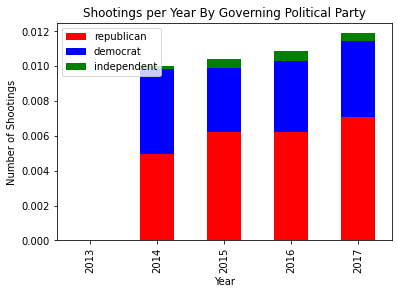

In [15]:
republican = [0,0,0,0,0]
democrat = [0,0,0,0,0]
independent = [0,0,0,0,0]

for key in dict_state_shootings_per_year:
    val = dict_state_shootings_per_year[key]
    i = 0
    while i < 5:
        if i == 0:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2013[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2013[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2013[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 1:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2014[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2014[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2014[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 2:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2015[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2015[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2015[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 3:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2016[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2016[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2016[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 4:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2017[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2017[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2017[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        i+=1

index = ['2013', '2014', '2015', '2016', '2017']
df_year_party = pd.DataFrame({'republican': republican, 'democrat': democrat, 'independent':independent}, index=index)
ax = df_year_party.plot.bar(stacked=True, color={"republican":"red", "democrat":"blue", "independent":"green"}, title="Shootings per Year By Governing Political Party")
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Shootings")
ax.set

The stacked bar plot above shows the number of shootings per year split by governing political party. The bar for 2013 looks nonexistent but this is because that year's proportion of shootings is significantly smaller than the following years. In 2014, it seems that the number of shootings are split evenly between Republican and Democrat. In 2015 and 2016, more shootings seem to occur in Republican governed states. In 2017 it is clearly evident to the naked eye that more shootings occurred in Republican governed states. This plot shows strong support for our initial hypothesis that more shootings occur in Repblican governed states. We attribute this to the beliefs of the Republican party on relaxed gun control laws and support for the Second Ammendment. We conclude that this belief of the Republican Party is a cause for heightened gun incidents in America.

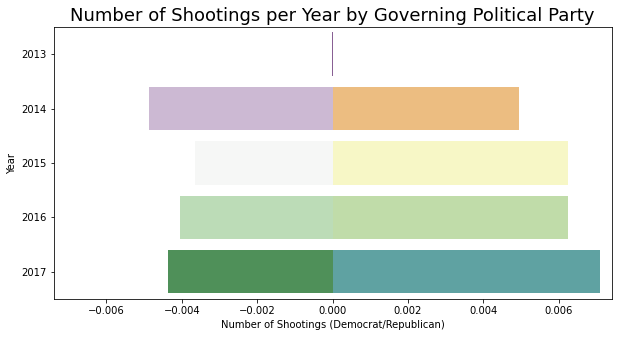

In [16]:
democrat = [-1*x for x in democrat]
plt.rcParams["figure.figsize"] = (10, 5)
df_party = pd.DataFrame({'Year': index, 
                    'Democrat': democrat, 
                    'Republican': republican})

#Class
YearClass = index
#Chart
bar_plot = sns.barplot(x='Democrat', y='Year', data=df_party, order=YearClass, lw=0, palette="PRGn")
bar_plot = sns.barplot(x='Republican', y='Year', data=df_party, order=YearClass, lw=0, palette="Spectral")
plt.xlim([-0.0074, 0.0074])
plt.title("Number of Shootings per Year by Governing Political Party", fontsize=18)
plt.xlabel("Number of Shootings (Democrat/Republican)")
plt.show()

Here we display the number of shootings per year split by governing political party in a pyramid bar plot. This allows us to better visualize the data from the previous plot. We can now see that it is more obvious that republican governed states had more shootings than democrat governed states. We chose not to display independent governed states as the data was small and insignificant to the bigger picture. For 2014, the number of shootings between democrat and republican states seems to be about the same. However, for the years 2015, 2016, and 2017, republican governed states have more shootings than democrat states by a larger margin, once again supporting our hypothesis that more shootings would occur in Republican governed states.

### ***Part 3: Population Demographics for Gun Violence Incidents***

Below we are adding to the df_age dataframe we created earlier to calculate the number of susppects per incident. Using helper functions, we are able to add total suspects, the list of suspects using their number values, suspects' age groups, number of teens, and number of adults for each incident.

In [21]:
def suspects(x):
    count = 0
    for key in x:
        if x[key] == 'Subject-Suspect':
            count += 1
    return count
    
def list_count(x):
    return [key for key in x if x[key] == 'Subject-Suspect']

def make_groups(x):
    return [x[key] for key in x]

def teen(x):
    count = 0
    for key in x:
        if x[key] == 'Teen 12-17':
            count += 1
    return count

def adult(x):
    count = 0
    for key in x:
        if x[key] == 'Adult 18+':
            count += 1
    return count


df_age['suspects_no'] = df_age['participant_type'].apply(suspects)
df_age['suspects_list'] = df_age['participant_type'].apply(list_count)
df_age['suspect_age_groups'] = df_age['participant_age_group'].apply(make_groups)
df_age['suspect_teens'] = df_age['participant_age_group'].apply(teen)
df_age['suspect_adults'] = df_age['participant_age_group'].apply(adult)
df_age['combined'] = df_age.apply(lambda x: list([x['suspect_teens'],
                                        x['suspect_adults']]),axis=1) 
df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/842186520.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_no'] = df_age['participant_type'].apply(suspects)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/842186520.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_list'] = df_age['participant_type'].apply(list_count)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/842186520.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,...,suspect_age_groups,suspect_teens,suspect_adults,combined,suspect_18-24,suspect_25-40,suspect_41-56,suspect_57-66,suspect_67-75,suspect_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,9.0,"Shot - Dead (murder, accidental, suicide)||Dri...",35.0670,...,"[Adult 18+, Teen 12-17, Adult 18+]",1,2,"[1, 2]",1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,2.0,Shots Fired - No Injuries,41.2960,...,[Adult 18+],0,1,"[0, 1]",0,1,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,2.0,Shot - Wounded/Injured,41.1918,...,"[Adult 18+, Teen 12-17]",1,1,"[1, 1]",0,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,3.0,Shot - Wounded/Injured||Domestic Violence,42.1306,...,"[Adult 18+, Adult 18+]",0,2,"[0, 2]",0,0,0,0,1,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,3.0,Shot - Wounded/Injured,37.5488,...,[Adult 18+],0,1,"[0, 1]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,7.0,Shot - Wounded/Injured||Drive-by (car to stree...,32.3752,...,[Teen 12-17],1,0,"[1, 0]",0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,17.0,Non-Shooting Incident||Officer Involved Incide...,42.2726,...,[Adult 18+],0,1,"[0, 1]",1,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,18.0,Shot - Wounded/Injured||Institution/Group/Busi...,27.4549,...,"[Teen 12-17, Teen 12-17]",2,0,"[2, 0]",0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8553,...,[Adult 18+],0,1,"[0, 1]",0,0,0,0,0,0


We are then using these new columns to calculate the total number of suspects and the number of suspects per age group for each incident. The method count_sus(x) and list_count_sus(x) return the total number of suspects and the list of all suspects for a particular incident. count_vic(x) and list_count_vic(x) do the the same but for victims. The make_groups() method iterates through each row in the suspects_list and participant_age_group and returns a list of all age_groups that map the suspects_list to the particular age group in that row. This idea is also used for other methods like teen(), adult_18_to_24(), ..., adult_76_plus(), which calculates the number of suspects that map to each of the sub age groups. Creating different age groups and mapping suspects into each of them will help us understand the distribution of this data more clearly.

In [26]:
def make_groups(grouplist):
    total_count = []
    count = []
    for people ,age_groups in zip(grouplist, df_age.participant_age_group):
        count = []
        for p in people:
            if len(age_groups) > p and p in age_groups:
                count.append(age_groups[p])
        total_count.append(count)
    return total_count

def teen(grouplist):
    total_count = []
    count = 0
    for people,age_groups in zip(grouplist, df_age.participant_age_group):
        count = 0
        for p in people:
            if len(age_groups) > p and p in age_groups:
                if age_groups[p] == 'Teen 12-17':
                    count += 1
        total_count.append(count)
    return total_count

def age_range(x, y, grouplist):
    total_count = []
    count = 0
    for people,age_groups in zip(grouplist, df_age.participant_age):
        count = 0
        for p in people:
            if len(age_groups) > p and p in age_groups:
                if age_groups[p] >= x and age_groups[p] <= y:
                    count += 1
        total_count.append(count)
    return total_count

def adult_76_plus(grouplist):
    total_count = []
    count = 0
    for people,age_groups in zip(grouplist, df_age.participant_age):
        count = 0
        for p in people:
            if len(age_groups) > p and p in age_groups:
                if age_groups[p] >= 76:
                    count += 1
        total_count.append(count)
    return total_count


In [30]:
def count_sus(x):
    count = 0
    for key in x:
        if x[key] == 'Subject-Suspect':
            count += 1
    return count

def list_count_sus(x):
    return [key for key in x if x[key] == 'Subject-Suspect']

df_age['suspects_no'] = df_age['participant_type'].apply(count_sus)
df_age['suspects_list'] = df_age['participant_type'].apply(list_count_sus)
df_age['suspect_age_groups'] = make_groups(df_age.suspects_list)
df_age['suspect_teens'] = teen(df_age.suspects_list)
df_age['suspect_18-24'] = age_range(18, 24, df_age.suspects_list)
df_age['suspect_25-40'] = age_range(25, 40, df_age.suspects_list)
df_age['suspect_41-56'] = age_range(41, 46, df_age.suspects_list)
df_age['suspect_57-66'] = age_range(57, 66, df_age.suspects_list)
df_age['suspect_67-75'] = age_range(67, 75, df_age.suspects_list)
df_age['suspect_76'] = adult_76_plus(df_age.suspects_list)

df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/3445878391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_no'] = df_age['participant_type'].apply(count_sus)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/3445878391.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_list'] = df_age['participant_type'].apply(list_count_sus)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/3445878391.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,...,victims_no,victims_list,victim_age_groups,victim_teens,victim_18-24,victim_25-40,victim_41-56,victim_57-66,victim_67-75,victim_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,9.0,"Shot - Dead (murder, accidental, suicide)||Dri...",35.0670,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,2.0,Shots Fired - No Injuries,41.2960,...,0,[],[],0,0,0,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,2.0,Shot - Wounded/Injured,41.1918,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,3.0,Shot - Wounded/Injured||Domestic Violence,42.1306,...,1,[0],[Adult 18+],0,0,0,0,1,0,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,3.0,Shot - Wounded/Injured,37.5488,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,7.0,Shot - Wounded/Injured||Drive-by (car to stree...,32.3752,...,1,[0],[Teen 12-17],1,0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,17.0,Non-Shooting Incident||Officer Involved Incide...,42.2726,...,0,[],[],0,0,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,18.0,Shot - Wounded/Injured||Institution/Group/Busi...,27.4549,...,1,[0],[],0,0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8553,...,1,[0],[Adult 18+],0,0,1,0,0,0,0


We then calculate the sum of suspect teens and other age groups for all incidents in total. This will be used to graph the age groups with the number of suspects per age group. Below is the barplot that shows this distribution. As seen below, the age group 25-40 has the highest number of suspects for all incidents in the year of 2017, while the age group 76+ has the lowest.

Teens :  2897
18-24 :  9067
25-40 :  10841
41-56 :  1546
57-66 :  752
67-75 :  238
75+ :  108
Total :  24697


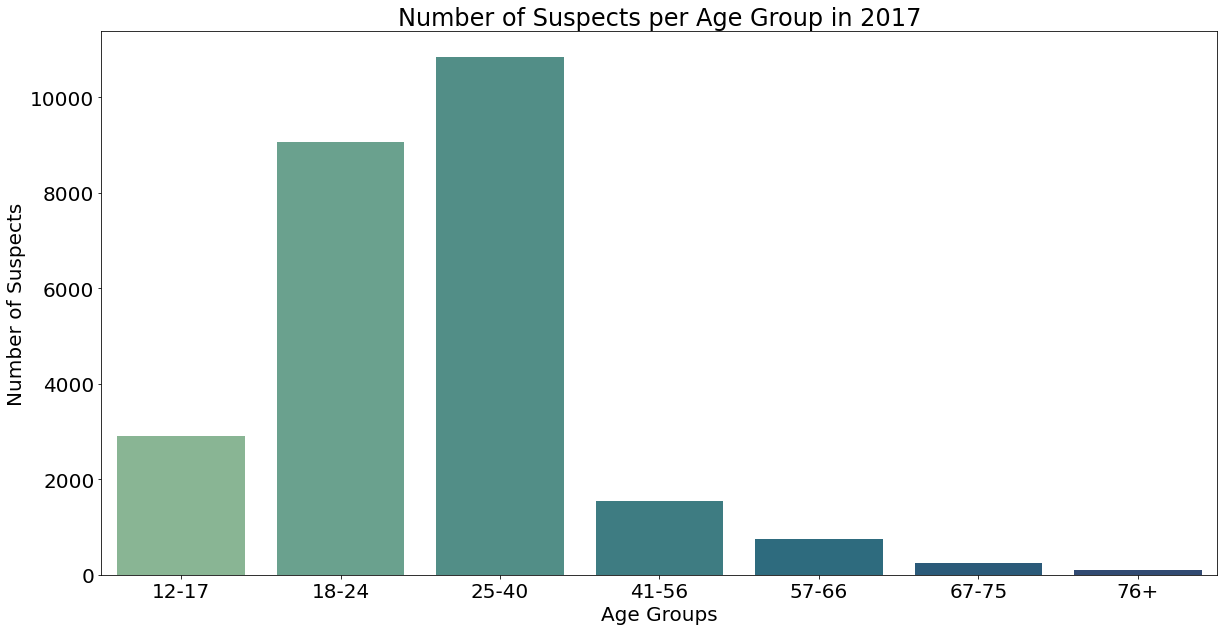

In [31]:
total_teens = df_age.loc[:, 'suspect_teens'].sum()
total_18_24 = df_age.loc[:, 'suspect_18-24'].sum()
total_25_40 = df_age.loc[:, 'suspect_25-40'].sum()
total_41_56 = df_age.loc[:, 'suspect_41-56'].sum()
total_57_66 = df_age.loc[:, 'suspect_57-66'].sum()
total_67_75 = df_age.loc[:, 'suspect_67-75'].sum()
total_75_plus = df_age.loc[:, 'suspect_76'].sum()
print("Teens : ", total_teens)
print("18-24 : ", total_18_24)
print("25-40 : ", total_25_40)
print("41-56 : ", total_41_56)
print("57-66 : ", total_57_66)
print("67-75 : ", total_67_75)
print("75+ : ", total_75_plus)
print("Total : ", total_teens+total_18_24+total_25_40+total_41_56+total_67_75+total_75_plus)
sns.barplot(x=['12-17', '18-24', '25-40', '41-56',
              '57-66', '67-75', '76+'], 
            y=[total_teens, total_18_24, total_25_40, total_41_56, total_57_66, total_67_75, total_75_plus], 
            palette="crest")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Age Groups")
plt.ylabel("Number of Suspects")
plt.title("Number of Suspects per Age Group in 2017")
plt.rcParams.update({'font.size': 20})
plt.show()

The graph above is a bar plot of the number of suspects per age group in the year 2017. As seen above, the graph is skewed right with the age group 25-40 having the highest number of suspects in this year. The age group with the second highest number of suspects is the 18-24 age group. This plot shows high suspect cases for the younger age groups, especially the newer generations, with an unexpectedly high number of suspects in the 12-17 age group, showing the increasing crime rates for juveniles. The number of suspects between the age of 12-17 and 18-24 combined surpasses that of the 25-40 age group, showing that many shooters are young. Why is it so easy for these children to get their hands on guns? This leads directly to gun control laws. Despite a child not having the license for a gun, if a family member has an appropriate license and gun in the house and misplaces it, it can easily fall into the wrong hands and be misused. 

The following code is a replica to the code above but calculates the number of victims for each incident instead.

In [32]:
def count_vic(x):
    count = 0
    for key in x:
        if x[key] == 'Victim':
            count += 1
    return count

def list_count_vic(x):
    return [key for key in x if x[key] == 'Victim']

df_age['victims_no'] = df_age['participant_type'].apply(count_vic)
df_age['victims_list'] = df_age['participant_type'].apply(list_count_vic)
df_age['victim_age_groups'] = make_groups(df_age.victims_list)
df_age['victim_teens'] = teen(df_age.victims_list)
df_age['victim_18-24'] = age_range(18, 24, df_age.victims_list)
df_age['victim_25-40'] = age_range(25, 40, df_age.victims_list)
df_age['victim_41-56'] = age_range(41, 56, df_age.victims_list)
df_age['victim_57-66'] = age_range(57, 66, df_age.victims_list)
df_age['victim_67-75'] = age_range(67, 75, df_age.victims_list)
df_age['victim_76'] = adult_76_plus(df_age.victims_list)

df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/4105842903.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['victims_no'] = df_age['participant_type'].apply(count_vic)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/4105842903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['victims_list'] = df_age['participant_type'].apply(list_count_vic)
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/4105842903.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,...,victims_no,victims_list,victim_age_groups,victim_teens,victim_18-24,victim_25-40,victim_41-56,victim_57-66,victim_67-75,victim_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,9.0,"Shot - Dead (murder, accidental, suicide)||Dri...",35.0670,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,2.0,Shots Fired - No Injuries,41.2960,...,0,[],[],0,0,0,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,2.0,Shot - Wounded/Injured,41.1918,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,3.0,Shot - Wounded/Injured||Domestic Violence,42.1306,...,1,[0],[Adult 18+],0,0,0,0,1,0,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,3.0,Shot - Wounded/Injured,37.5488,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,7.0,Shot - Wounded/Injured||Drive-by (car to stree...,32.3752,...,1,[0],[Teen 12-17],1,0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,17.0,Non-Shooting Incident||Officer Involved Incide...,42.2726,...,0,[],[],0,0,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,18.0,Shot - Wounded/Injured||Institution/Group/Busi...,27.4549,...,1,[0],[],0,0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8553,...,1,[0],[Adult 18+],0,0,1,0,0,0,0


Like the suspects, we calculate the sum of victim teens and the other age groups for all incidents in total. This will be used to graph the age groups with the number of victims per age group. Below is the barplot that shows this distribution. As seen below, the age group 25-40 has the highest number of victims for all incidents in the year of 2017, while the age group 76+ has the lowest. This graph is very similar to the distribution for suspects, although the data count varies between the two, which is interesting to see.

Teens :  2794
18-24 :  8030
25-40 :  10647
41-56 :  3331
57-66 :  934
67-75 :  381
75+ :  190
Total :  25373


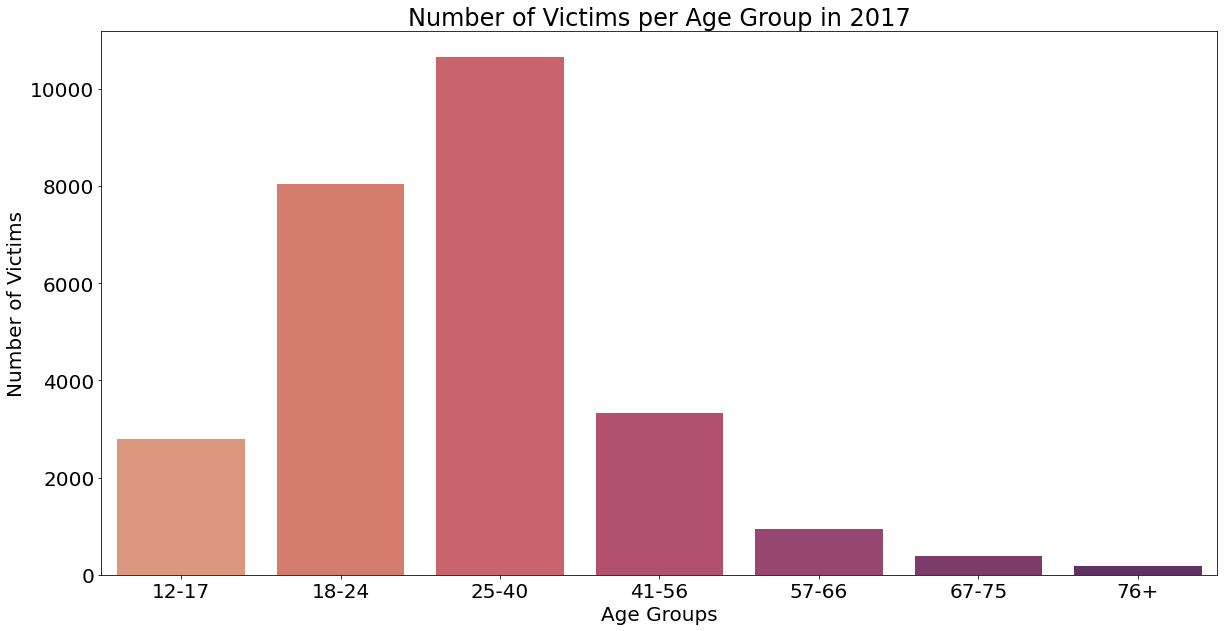

In [33]:
plt.figure()
total_teens = df_age.loc[:, 'victim_teens'].sum()
total_18_24 = df_age.loc[:, 'victim_18-24'].sum()
total_25_40 = df_age.loc[:, 'victim_25-40'].sum()
total_41_56 = df_age.loc[:, 'victim_41-56'].sum()
total_57_66 = df_age.loc[:, 'victim_57-66'].sum()
total_67_75 = df_age.loc[:, 'victim_67-75'].sum()
total_75_plus = df_age.loc[:, 'victim_76'].sum()
print("Teens : ", total_teens)
print("18-24 : ", total_18_24)
print("25-40 : ", total_25_40)
print("41-56 : ", total_41_56)
print("57-66 : ", total_57_66)
print("67-75 : ", total_67_75)
print("75+ : ", total_75_plus)
print("Total : ", total_teens+total_18_24+total_25_40+total_41_56+total_67_75+total_75_plus)
sns.barplot(x=['12-17', '18-24', '25-40', '41-56',
              '57-66', '67-75', '76+'], 
            y=[total_teens, total_18_24, total_25_40, total_41_56, total_57_66, total_67_75, total_75_plus], 
            palette="flare")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Age Groups")
plt.ylabel("Number of Victims")
plt.title("Number of Victims per Age Group in 2017")
plt.rcParams.update({'font.size': 20})
plt.show()

The graph above is a bar plot of the number of victims per age group in the year 2017. This graph is surprisingly very similar to the bar graph for suspects per age group. As seen above, the graph is also skewed right with the age group 25-40 having the highest number of victims in this year. The age group with the second highest number of victims is the 18-24 age group. This plot shows high victim cases for the younger age groups, especially the newer generations, with an unexpectedly high number of victims in the 12-17 age group, showing the similarity in distributions of age groups with the suspect cases. This plot also shows that the age group 12-17 and 18-24 combined surpasses that of any other age group. Many victims of gun incidents are children. Why must the innocent children suffer from our mistakes?

### *Gender analysis of suspects*

In [34]:
def gender(gender):
    total_count = []
    count = 0
    for suspects,genders in zip(df_age.suspects_list, df_age.participant_gender):
        count = 0
        for sus in suspects:
            if len(genders) > sus and sus in genders:
                if genders[sus] == gender:
                    count += 1
        total_count.append(count)
    return total_count
df_age['females'] = gender('Female')
df_age['males'] = gender('Male')
df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/1296275138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['females'] = gender('Female')
C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/1296275138.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['males'] = gender('Male')


,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,...,victim_age_groups,victim_teens,victim_18-24,victim_25-40,victim_41-56,victim_57-66,victim_67-75,victim_76,females,males
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,9.0,"Shot - Dead (murder, accidental, suicide)||Dri...",35.0670,...,[Adult 18+],0,1,0,0,0,0,0,0,2
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,2.0,Shots Fired - No Injuries,41.2960,...,[],0,0,0,0,0,0,0,0,1
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,2.0,Shot - Wounded/Injured,41.1918,...,[Adult 18+],0,1,0,0,0,0,0,0,1
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,3.0,Shot - Wounded/Injured||Domestic Violence,42.1306,...,[Adult 18+],0,0,0,0,1,0,0,0,1
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,3.0,Shot - Wounded/Injured,37.5488,...,[Adult 18+],0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,7.0,Shot - Wounded/Injured||Drive-by (car to stree...,32.3752,...,[Teen 12-17],1,0,0,0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,17.0,Non-Shooting Incident||Officer Involved Incide...,42.2726,...,[],0,0,0,0,0,0,0,0,1
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,18.0,Shot - Wounded/Injured||Institution/Group/Busi...,27.4549,...,[],0,0,0,0,0,0,0,0,2
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,41.8553,...,[Adult 18+],0,0,1,0,0,0,0,0,1


Males :  31744
Females :  2565


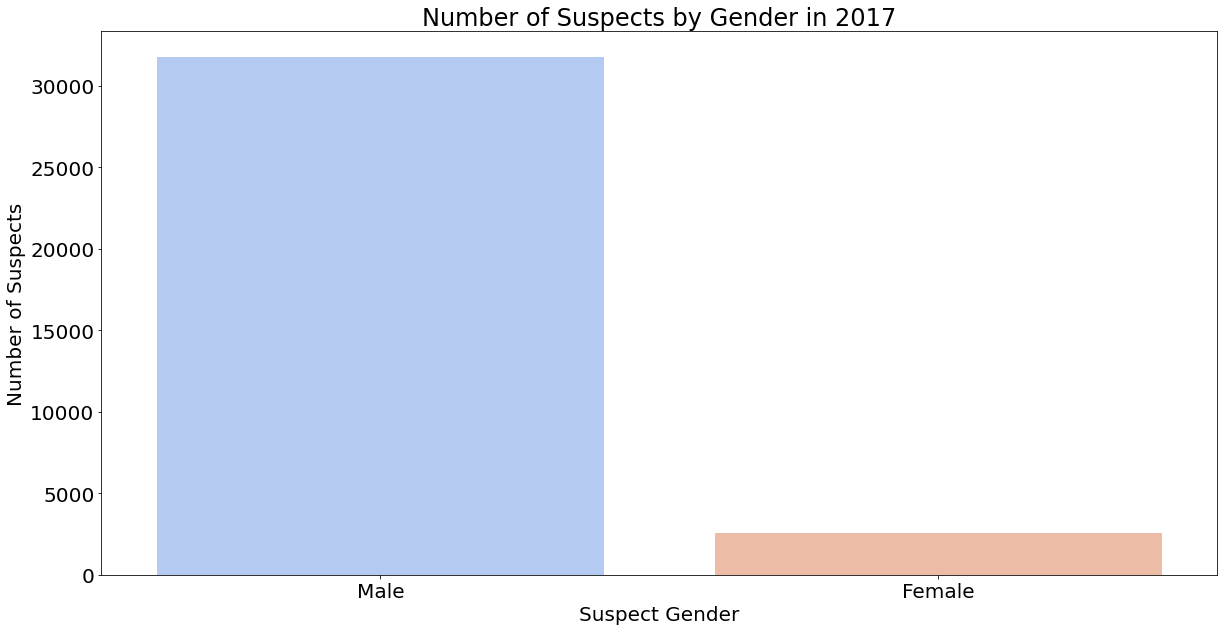

In [75]:
plt.figure()
total_female = df_age.loc[:, 'females'].sum()
total_male = df_age.loc[:, 'males'].sum()
print("Males : ", total_male)
print("Females : ", total_female)
sns.barplot(x=['Male', 'Female'], 
            y=[total_male, total_female], 
            palette="coolwarm")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Suspect Gender")
plt.ylabel("Number of Suspects")
plt.title("Number of Suspects by Gender in 2017")
plt.rcParams.update({'font.size': 20})
plt.show()

The graph above displays a bar plot of the number of suspects distributed by gender in the year 2017. As seen above, the number male suspects is considerably greater than the number of female suspects by a ratio of approximately 12:1. This is unpredicted, since the percentage of females in the country in the year 2017 is almost 51%, not matching the suspect ratio derived above. We conclude this ratio is significant enough to prove that there is a large proportion of male shooters in the year 2017 throughout the country.

### ***Linear Regression***

We wanted to be able to get a more detailed insight on the degree of shooting incidents for each state over time more granuarly, and understand if there is any valid relationship between the total number of shootings that happen in each state for each month, for each year. This would allow us to quantify the degree of change for each month more easily, specifically quantifying the change in the highest degree of incidents. We define the ‘degree of incidents; as the number of shootings per capita for each state. Given the vast distinctions in total population over all states, classifying the ‘degree of safety’ for each state just by the sheer number of shootings would be unfair. Thus, it is important to normalize the data by the total population. Thus, we thought that creating a scatter plot would be appropriate. A scatter plot would allow us to easily visualize the distribution of the degree of shooting incidents for each state as each data point is visually available for analysts to generalize trends from. A linear regression was calculated and plotted to understand whether a strong correlation between the degree of incidents for between all states for any of the years exists.

In [74]:
# total incidents for each state in each year

def count_incidents(x):
    temp = pd.DataFrame(columns = ['state', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    states = sorted(list(df_2017.state.unique()))
    months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    for i in states: 
        state_df = x[x.state == i] #dataframe for each state
        dict = {'state': i, 'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0} #what we want for that state
        for j in months.keys():
            count = 0
            for index, row in state_df.iterrows():
                if row['date'].month == j: 
                    count = count + 1
                dict[months[j]] = count
        temp = temp.append(dict, ignore_index=True)
    
    return temp
    
df_2013_2017["date"] = pd.to_datetime(df_2013_2017["date"])
numincidents_2013 = count_incidents(df_2013_2017[df_2013_2017['date'].dt.year == int(2013)])
numincidents_2014 = count_incidents(df_2013_2017[df_2013_2017['date'].dt.year == int(2014)])
numincidents_2015 = count_incidents(df_2013_2017[df_2013_2017['date'].dt.year == int(2015)])
numincidents_2016 = count_incidents(df_2013_2017[df_2013_2017['date'].dt.year == int(2016)])
numincidents_2017 = count_incidents(df_2013_2017[df_2013_2017['date'].dt.year == int(2017)])



C:\Users\radhi\AppData\Local\Temp/ipykernel_20300/3700747541.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_2017["date"] = pd.to_datetime(df_2013_2017["date"])


The function above calculates the number of incidents that occur for each state, for each month for a particular year. We calculate this for all years 2013 - 2017. The dataframe to maintain these sums looks like the following. 

In [2]:
numincidents_2015.head(10)

NameError: name 'numincidents_2015' is not defined

The functions below help create the scatter plot and regression line for each year, and normalize the total number of incidents count for each state, per month, per year. 

In [77]:
from sklearn.linear_model import LinearRegression
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def scatter_and_regress(x, year):
    m = np.array([])
    n = np.array([])
    plt.figure()
    for i in range(1, 13):
        m = np.append(m, np.repeat(i, 51))
        tot = x[months[i]].values.tolist()
        max_val = max(tot)
        max_ind = tot.index(max_val)
        n = np.append(n, tot)
        plt.scatter(np.repeat(i, 51), x[months[i]].values.tolist())
        plt.annotate(x.state[max_ind], (i, max_val))

    x = m.reshape(-1, 1)
    y = n.reshape(-1, 1)
    linreg = LinearRegression()
    linreg.fit(x,y)
    coeff = linreg.coef_[0,0]
    intercept = linreg.intercept_[0]  
    title = 'Total Number of Incidents per Month per State for ' +  year 
    plt.plot(x, coeff*x+intercept, c='red')
    plt.title(title)
    plt.xticks([i for i in range(1, 13)],months_list)
    plt.show()

def normalize(x, year):
    norm = pd.DataFrame()
    norm['state'] = x['state']
    for i in months_list:
        norm[i] = x[i]/df_populations[year]*10000
    return norm 

numincidents_2013_normalized = normalize(numincidents_2013, '2013')
numincidents_2014_normalized = normalize(numincidents_2014, '2014')
numincidents_2015_normalized = normalize(numincidents_2015, '2015')
numincidents_2016_normalized = normalize(numincidents_2016, '2016')
numincidents_2017_normalized = normalize(numincidents_2017, '2017')

Below is the result for some of the rows for one of the dataframes that was normalized. 

In [78]:
numincidents_2015_normalized.head(5)

,state,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Alabama,0.177234,0.136017,0.189599,0.164869,0.199903,0.160747,0.199903,0.199903,0.162808,0.21639,0.164869,0.158686
1,Alaska,0.338984,0.352543,0.528815,0.515256,0.610171,0.393221,0.393221,0.596612,0.474578,0.42034,0.21695,0.311865
2,Arizona,0.05564,0.052711,0.07321,0.05564,0.060032,0.042462,0.060032,0.086388,0.07321,0.05564,0.035141,0.052711
3,Arkansas,0.167895,0.090663,0.100737,0.130958,0.161179,0.157821,0.181327,0.174611,0.204832,0.154464,0.130958,0.151106
4,California,0.072974,0.064495,0.077085,0.069634,0.074002,0.06321,0.073745,0.067321,0.069634,0.068349,0.060897,0.069634


Scatter plots and regression lines indicating the data for total number of shootings per capita for each state for each year are shown below. The state with the highest number of shootings for each month is also

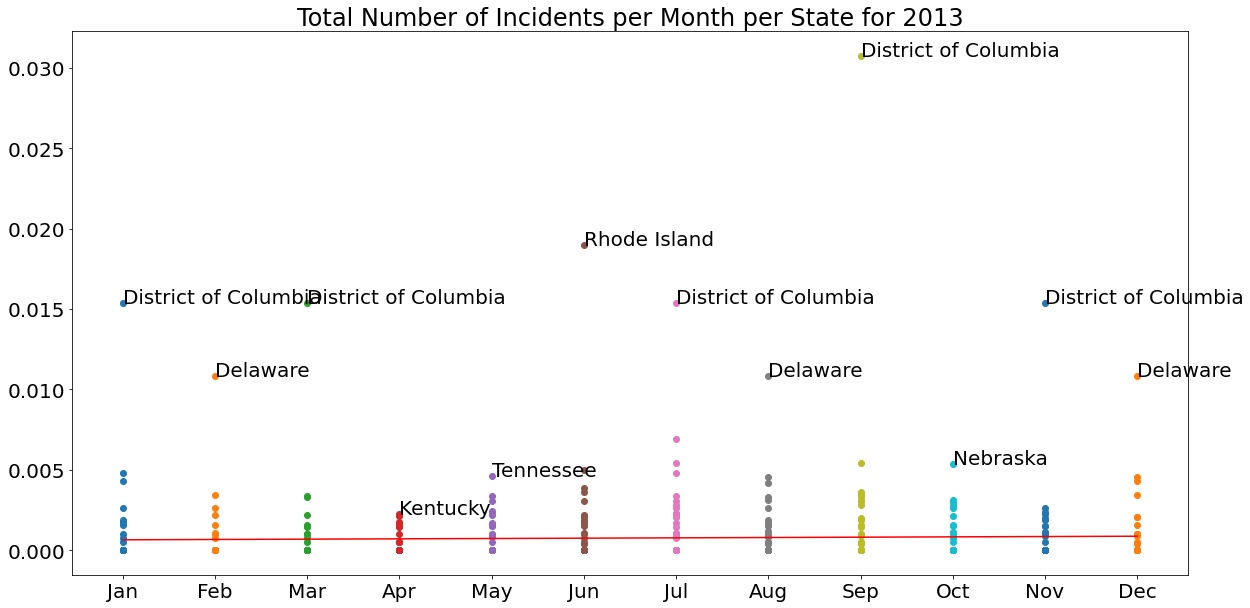

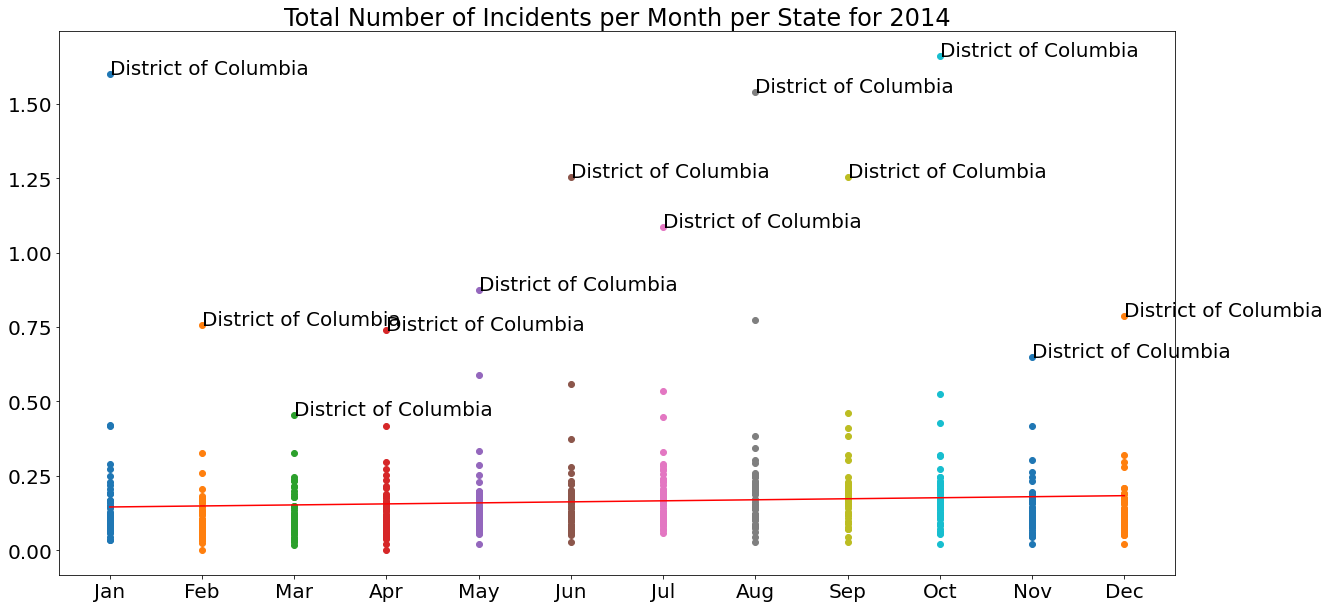

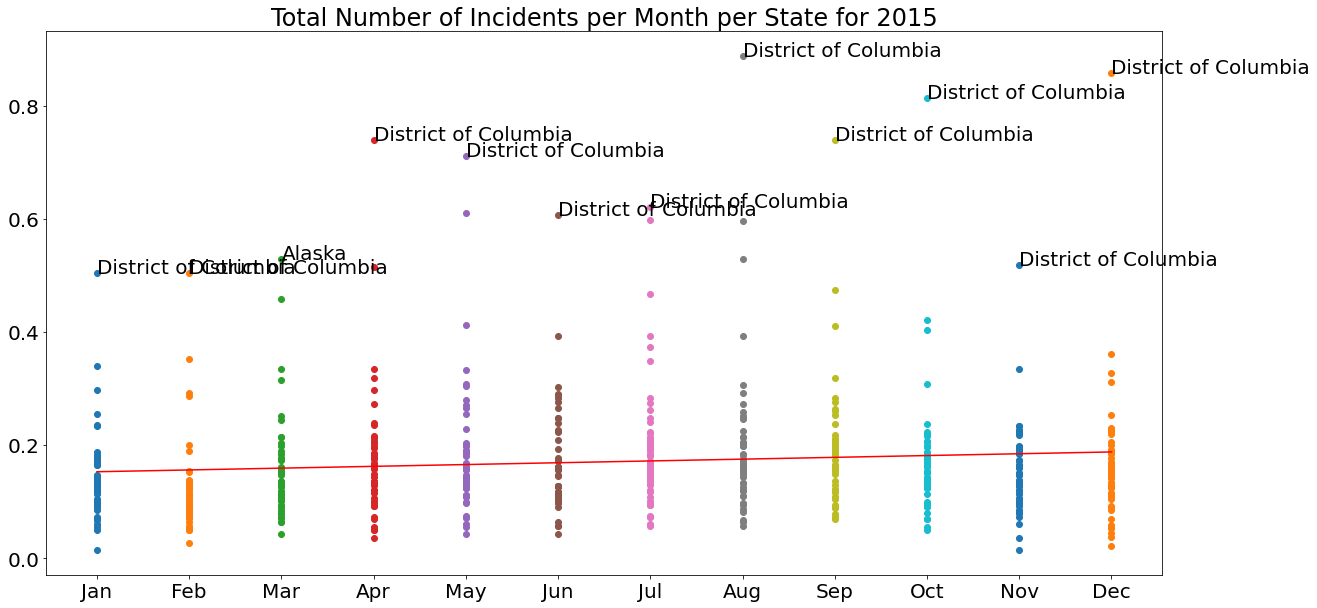

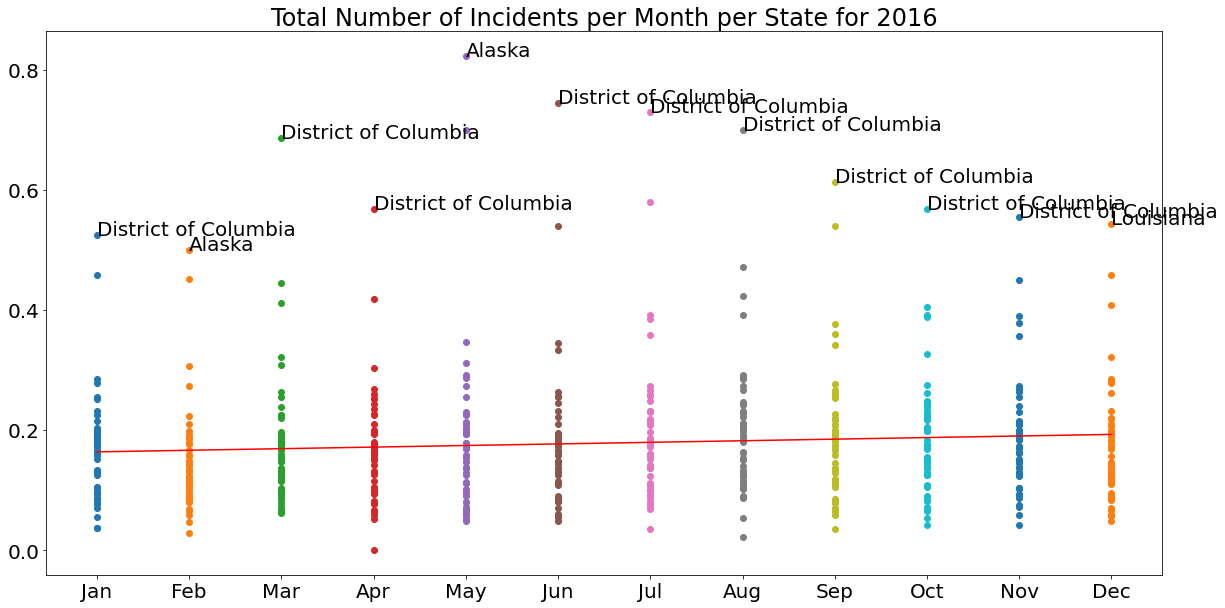

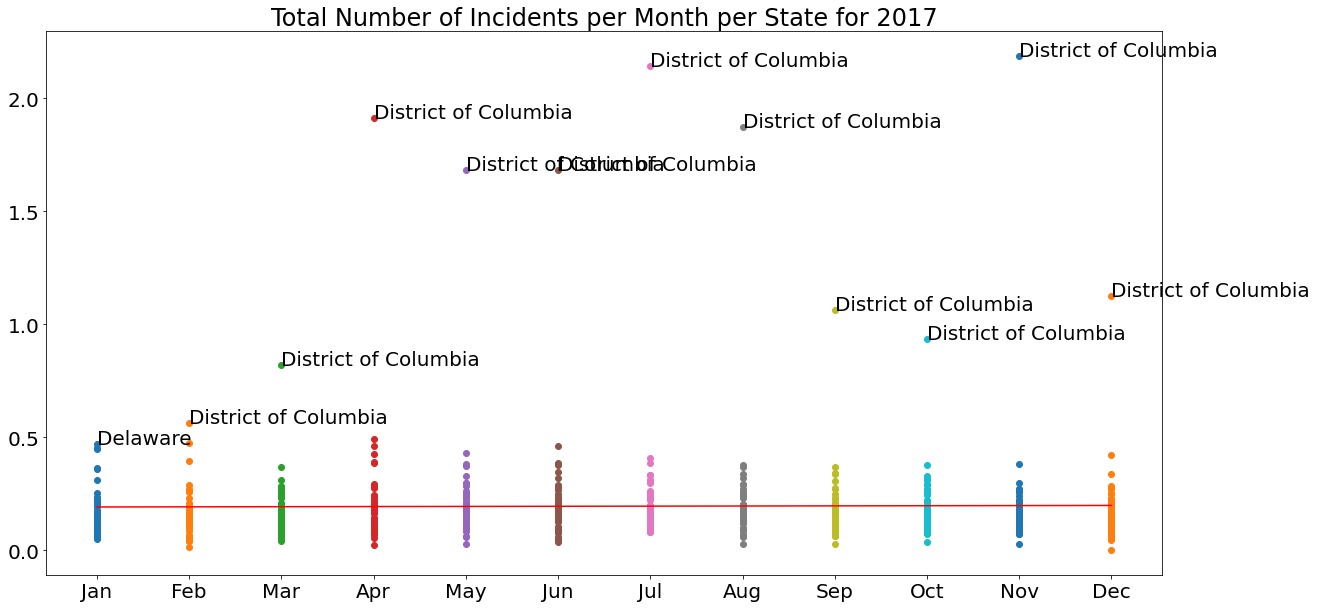

In [79]:
scatter_and_regress(numincidents_2013_normalized, '2013')
scatter_and_regress(numincidents_2014_normalized, '2014')
scatter_and_regress(numincidents_2015_normalized, '2015')
scatter_and_regress(numincidents_2016_normalized, '2016')
scatter_and_regress(numincidents_2017_normalized, '2017')

The plots above clearly reveal a new finding, our national capital, DC, clearly dominates the per capita shootings for each month for every year that we analyzed thus far. There is clearly not enough data in 2013 to support this finding, but we assume that if it did, it would follow the trend of the following years. We had tried making a violin plot for all the years. However, it did not visually represent the degree of deviation DC has from all the other states. We realized that in our folium plots, DC was not plotted as it was not present in the json file used to map to the states. We tried finding a different json file with DC included but sadly to no avail. The plot above reveals that DC in fact had the highest shootings per capita for 2014-2017.

## **CONCLUSION**

From our tutorial we are able to conclude that the District of Columbia has the most shootings per capita for a majority of the years. In addition, a majority of gun incidents occur in Republican governed states by young males. This all supports our initial hypothesis that the root cause of America’s gun problem is its lack of gun control laws supported by the Republican Party. In addition, a majority of the suspects in these gun incidents were teenagers and young adults, dominantly males. This tutorial helped us visualize data and debunk some of our own initial thoughts while supporting others. 